In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 과정 참고 : https://velog.io/@dayday/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-%EA%B0%9C%EC%9A%94-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EB%B6%84%EB%A5%98

In [1]:
path = 'C:/Users/Admin/Desktop/stt_data/'
only_okt_file_path = path + 'tokenized/only_tag_okt.csv'
only_komoran_file_path = path + 'tokenized/only_tag_komoran.csv'
only_kkma_file_path = path + 'tokenized/only_tag_kkma.csv'
only_hannanum_file_path = path + 'tokenized/only_tag_hannanum.csv'



In [4]:
okt_train = pd.read_csv(only_okt_file_path)
komoran_train = pd.read_csv(only_komoran_file_path)
kkma_train = pd.read_csv(only_kkma_file_path)
hannanum_train = pd.read_csv(only_hannanum_file_path)


tokenized_okt = pd.read_csv( path +'tokenized/tokenized_okt.csv')
tokenized_komoran = pd.read_csv( path +'tokenized/tokenized_komoran.csv')
tokenized_kkma = pd.read_csv( path +'tokenized/tokenized_kkma.csv')
tokenized_hannanum = pd.read_csv( path +'tokenized/tokenized_hannanum.csv')

In [5]:
print(tokenized_okt.info())
print(tokenized_komoran.info())
print(tokenized_kkma.info())
print(tokenized_hannanum.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107068 entries, 0 to 107067
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   X       107047 non-null  object
 1   Y       107056 non-null  object
 2   label   107068 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107068 entries, 0 to 107067
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   X       105990 non-null  object
 1   Y       106759 non-null  object
 2   label   107068 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107068 entries, 0 to 107067
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   X       106728 non-null  object
 1   Y       106930 non-null  object
 2   label   107068 non-null  int64 
dtype

### 불용어 제거 과정에서 문장에 의미가 없는 것만 있어서 main_pos 가 NaN으로 처리된 값들을 발견함

In [6]:
# 결측값 제거
tokenized_okt.dropna(inplace=True)
tokenized_komoran.dropna(inplace=True)
tokenized_kkma.dropna(inplace=True)
tokenized_hannanum.dropna(inplace=True)

In [7]:
print(tokenized_okt.info())
print(tokenized_komoran.info())
print(tokenized_kkma.info())
print(tokenized_hannanum.info())


<class 'pandas.core.frame.DataFrame'>
Index: 107035 entries, 0 to 107067
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   X       107035 non-null  object
 1   Y       107035 non-null  object
 2   label   107035 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 105691 entries, 0 to 107067
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   X       105691 non-null  object
 1   Y       105691 non-null  object
 2   label   105691 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 106594 entries, 0 to 107067
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   X       106594 non-null  object
 1   Y       106594 non-null  object
 2   label   106594 non-null  int64 
dtypes: int64(1), ob

In [8]:
# 박스플롯
plt.figure(figsize=(12, 5))
plt.boxplot(train_length,
             tick_labels=['counts'],
             showmeans=True)

NameError: name 'train_length' is not defined

<Figure size 1200x500 with 0 Axes>

## TF-IDF 벡터화

In [9]:
RANDOM_SEED = 25
TEST_SPLIT = 0.25
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
okt_train.head()

,X,Y,label
0,"네 , 안녕하세요 ?","네 , 안녕하십니까 ?",0
1,다름이 아니고 저희 아들 이 디딤 씨앗 통장 을 . 해지 하려고 하는데요 .,죄송합니다만 제 가 답변 이 어렵기 때문 에 담당자 연결해 드리도록 하겠습니다 .,0
2,"네 , 알겠습니다 .","고객 님 혹시 라도 연결 중 전화 가 끊긴다면 . 예 , 담당자 바로 연결 해드리겠...",0
3,"네 , 알겠습니다 .","네 , 좋은 상담 이어 가세 요 . 고객 님 께서 디딤 씨앗 통장 해지 관련 으로 ...",0
4,아 저 몇 가지 여쭤 볼 게 있어가지고요 . 여쭤 보려면 어디 로 통화 를 해야 되...,혹시 어떤 불편 사항 이신 가요 ? 고객 님 .,0


In [12]:
# 소수점 4의자리까지만 씀
    
def logistic_regression(dataframe, name):
    vectorizer = TfidfVectorizer()
    x_text = list(dataframe['X'])
    y_text = list(dataframe['Y'])
    X = vectorizer.fit_transform(x_text)
    Y = vectorizer.fit_transform(y_text)
    label = np.array(list(dataframe['label']))
    
    
    
    x_train, x_test, label_train, label_test = train_test_split(X, label, test_size=TEST_SPLIT, random_state=RANDOM_SEED)
    
    lgs = LogisticRegression(class_weight='balanced', max_iter=5000)
    lgs.fit(x_train, label_train)
    label_probs = lgs.predict_proba(x_test)[:, 1]
    print(f"{name} x_Accuracy :{lgs.score(x_test, label_test):.4f}")
    # print(f"{name} x_Accuracy :{predicted}")
    print()
    
    # 상담사 기준 logistic Regression
    # y_train, y_test, label_train, label_test = train_test_split(Y, label, test_size=TEST_SPLIT, random_state=RANDOM_SEED)
    # 
    # lgs = LogisticRegression(class_weight='balanced', max_iter=5000)
    # lgs.fit(y_train, label_train)
    # # predicted = lgs.predict(y_eval)
    # label_probs = lgs.predict_proba(y_test)[:, 1]
    # print(f"{name} y_Accuracy :{lgs.score(y_test, label_test):.4f}")
    # roc_score(label_probs, label_test)
    # # print(f"{name} y_Accuracy :{predicted}")
    
    return (name, label_test, label_probs)
        


In [13]:
okt_lr = logistic_regression(okt_train, "okt")
komoran_lr = logistic_regression(komoran_train, "komoran")
kkma_lr = logistic_regression(kkma_train, "kkma")
hannanum_lr = logistic_regression(hannanum_train, "hannanum")

okt x_Accuracy :0.7769

komoran x_Accuracy :0.7757

kkma x_Accuracy :0.7769

hannanum x_Accuracy :0.7764



## 품사 태깅 이후 로지스틱 측정

In [14]:
print("after tokenized")
token_okt_lr = logistic_regression(tokenized_okt, "okt")
token_komoran_lr = logistic_regression(tokenized_komoran, "komoran")
token_kkma_lr = logistic_regression(tokenized_kkma, "kkma")
token_hannanum_lr = logistic_regression(tokenized_hannanum, "hannanum")

after tokenized
okt x_Accuracy :0.7791

komoran x_Accuracy :0.7637

kkma x_Accuracy :0.7624

hannanum x_Accuracy :0.7737



## ROC CURVE, SCORE

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
def roc_score(lr_models):
    # ROC 곡선 그리기
    plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
    
    colors = ['limegreen', 'violet', 'dodgerblue', 'brown']
    # lr_model = (name, label_test, label_probs)
    for idx, lr_model in enumerate(lr_models):
        fpr, tpr, thresholds = roc_curve(lr_model[1], lr_model[2])
        plt.plot(fpr, tpr, color=colors[idx], label=f"{lr_model[0]} ROC Curve")
        # AUC 계산
        roc_auc = roc_auc_score(lr_model[1], lr_model[2])
        print(f"{lr_model[0]} ROC-AUC Score : {roc_auc:.4f}")
        
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.show()
    


okt ROC-AUC Score : 0.8683
komoran ROC-AUC Score : 0.8698
kkma ROC-AUC Score : 0.8685
hannanum ROC-AUC Score : 0.8635


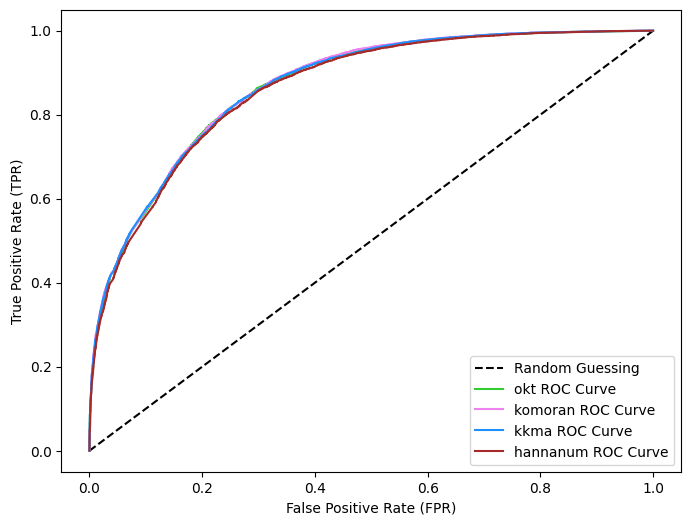

In [16]:
tag_lr_models = [okt_lr, komoran_lr, kkma_lr, hannanum_lr]
roc_score(tag_lr_models)

okt ROC-AUC Score : 0.8693
komoran ROC-AUC Score : 0.8647
kkma ROC-AUC Score : 0.8609
hannanum ROC-AUC Score : 0.8635


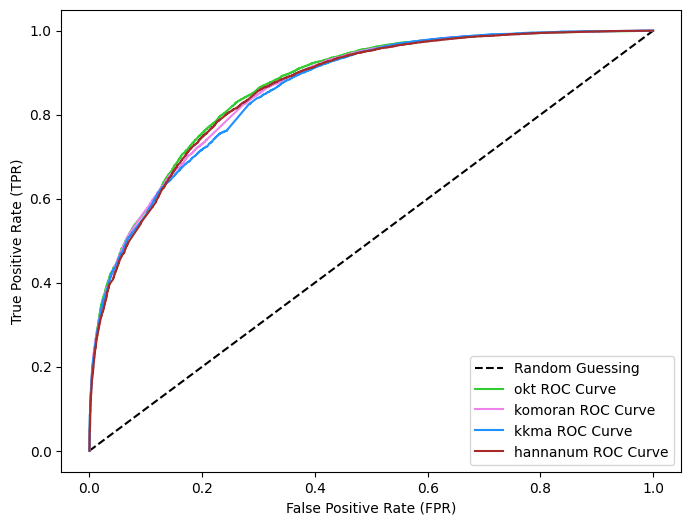

In [17]:
token_lr_models = [token_okt_lr, token_komoran_lr, token_kkma_lr, hannanum_lr]
roc_score(token_lr_models)

In [21]:
tokenized_okt

,X,Y,label
0,", 안녕하세요 ?",", 안녕하십니까 ?",0
1,다름이 아니고 아들 디딤 씨앗 통장 . 해지 하려고 하는데요 .,죄송합니다만 답변 어렵기 때문 담당자 연결해 드리도록 하겠습니다 .,0
2,", 알겠습니다 .","고객 님 라도 연결 중 전화 끊긴다면 . , 담당자 연결 해드리겠습니다 .",0
3,", 알겠습니다 .",", 좋은 상담 이어 가세 요 . 고객 님 께서 디딤 씨앗 통장 해지 관련 문의 하세...",0
4,가지 여쭤 볼 게 있어가지고요 . 여쭤 보려면 통화 해야 되나요 ?,불편 사항 이신 가요 ? 고객 님 .,0
...,...,...,...
107063,", 까 차량 소속 인지 자체 모르시길래 확인 하고 , . 확인 하고 접수 드린다 했...",그렇습니까 ? 라 믄 분 핸드폰 번호 알 수 있습니까 ?,1
107064,", , 민원 인 번호 말씀드리겠습니다 .",", 감사합니다 .",1
107065,", 감사합니다 .",드릴 까요 ?,1
107066,재산세 담당 하시는 분 자리 전화 번호 부탁 합니다 .,재산세 담당자 말씀 이십 니까 ? 실례 주택 분 이신 가요 토지 분 이신 가요 ? ...,1


okt ROC-AUC Score : 0.8693


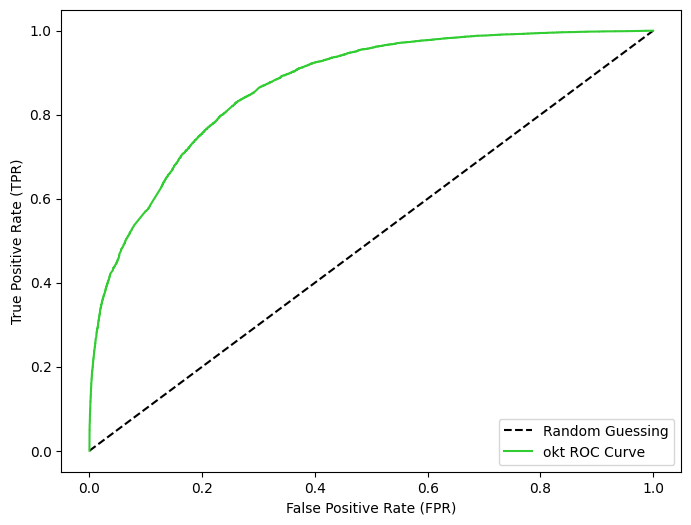

In [18]:
token_lr_models = [token_okt_lr]
roc_score(token_lr_models)

## WORD2VEC lightgbm

In [6]:
train_data2 = pd.read_csv(file_path)

texts = list(train_data2['text'])
sentences = []

for text in texts:
    sentences.append(text.split())

sentences

[['예,', '아유', '수고하세요.'],
 ['여쭤볼려고', '그러는데요.'],
 ['그', '지금', '그거', '뭘로', '들어가', '있어요?'],
 ['예,', '알겠습니다.'],
 ['다른', '더', '확인해', '드릴', '것은', '없으십니까?'],
 ['그럼', '좋은', '하루', '보내세요.'],
 ['여보세요.'],
 ['네,', '안녕하세요.', '무엇을', '도와드릴까요?'],
 ['예,', '통장에', '교육청소년과로', '해서', '찍혔는데.'],
 ['네,', '네.'],
 ['혹시', '보내주셨나', '해서요.'],
 ['교육청소년과로', '해서', '입금이', '됐다는', '말씀이십니까?'],
 ['출처를', '잘', '모르겠어가지고.'],
 ['혹시', '고객님', '뭐', '학자금', '대출', '이자', '관련으로', '신청하신', '적은', '없으십니까?'],
 ['이자요?'],
 ['예,', '예,', '학자금', '대출', '이자', '이런', '내용으로', '신청하신', '적은', '없으셨어요,', '고객님?'],
 ['국가', '장학금으로', '신청했는데.'],
 ['네,', '네.'],
 ['20', '20', '28만', '원밖에', '안', '돼서.'],
 ['네,',
  '그렇습니다.',
  '죄송합니다만',
  '그러면',
  '제가',
  '해당',
  '부서로',
  '좀',
  '문의를',
  '해드릴',
  '텐데',
  '청',
  '교육',
  '청소년과로만',
  '확인이',
  '되시는',
  '건가요?'],
 ['아,', '혹시', '언제', '얼마가', '입금이', '됐는지', '확인', '가능하십니까?'],
 ['12월', '28일', '날', '280000원', '280200원인가', '왔거든요.'],
 ['아,', '그러세요.', '잠시만', '기다려주시겠습니까?', '제가', '부서로', '문의해서', '안내해드리겠습니다.'],
 ['네.'],
 ['안녕하세요,'],
 ['선

num_features : 각 단어에 대해 임베딩된 벡터의 차원

min_word_count : 모델에 의미 있는 단어를 가지고 학습하기 위해 적은 빈도 수의 단어들은 학습하지 않는다.

num_workers : 모델 학습 시 사용할 프로세스 개수를 지정한다.

context : 컨텍스트 윈도우 크기를 지정한다.

downsampling : 학습을 수행할 때 빠른 학습을 위해 정답 단어 라벨에 대한 다운샘플링 비율을 지정한다. 일반적으로 0.001이 가장 성능이 좋다고 한다.

In [5]:
num_features = 100    
min_word_count = 20   
num_workers = 4       
context = 10          
down_sampling = 1e-3 

In [4]:
from gensim.models import Word2Vec
from tqdm import tqdm
import lightgbm as lgb



In [7]:
model = Word2Vec(sentences = sentences, vector_size = num_features, window = 5, min_count = 5, workers = num_workers, sg = 0)

In [8]:
model.wv.vectors.shape

(82303, 100)

In [59]:
model.wv.most_similar('문의')

[('문의를', 0.6449886560440063),
 ('연락', 0.5738487243652344),
 ('문의해', 0.5563974380493164),
 ('건의', 0.5472099781036377),
 ('문의좀', 0.5022971630096436),
 ('연락을', 0.49300023913383484),
 ('요청해', 0.49049922823905945),
 ('확인', 0.4882484972476959),
 ('상담해', 0.4757598340511322),
 ('말씀', 0.4726981818675995)]

In [9]:
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features),dtype=np.float32)

    num_words = 0
    index2word_set = set(model.wv.index_to_key)
    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[w])

    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [10]:
def get_dataset(reviews, model, num_features):
    dataset = list()
    
    for s in tqdm(reviews):
        dataset.append(get_features(s, model, num_features))

    review_feature_vecs = np.stack(dataset)
    
    return review_feature_vecs


In [20]:
# 실행
temp = sentences[:10000]
test_data_vecs = get_dataset(temp, model, num_features)

  0%|          | 0/10000 [00:00<?, ?it/s]C:\Users\Admin\AppData\Local\Temp\ipykernel_12784\647232008.py:11: RuntimeWarning: invalid value encountered in divide
  feature_vector = np.divide(feature_vector, num_words)
100%|██████████| 10000/10000 [00:53<00:00, 188.27it/s]


In [22]:
print(test_data_vecs)

[[ 0.26040646  1.6970495  -0.31634536 ... -0.7175288  -0.65964264
   0.9960367 ]
 [ 1.1553676  -0.09909447  0.5095275  ... -0.6374929  -2.1142695
  -1.105557  ]
 [-0.14027798  0.505892    0.6152332  ...  0.43569314  0.4969817
  -0.42432562]
 ...
 [-0.03667825 -0.7394834   1.0246114  ...  0.29360202 -0.09302141
   0.11667578]
 [-0.23513424 -0.4535849   0.38326892 ...  0.5624625   0.3173455
  -0.29710805]
 [-0.07900809  0.48672253 -0.8528666  ...  1.0095491  -0.2963843
  -0.17820314]]


In [24]:
X = test_data_vecs
y = np.array(labels[:10000])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

lgbm = lgb.LGBMClassifier(n_estimators=500)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_test,y_test)])

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0
[10]	valid_0's auc: 1	valid_0's binary_logloss: 0
[11]	valid_0's auc: 1	valid_0's binary_logloss: 0
[12]	valid_0's auc: 1	valid_0's binary_logloss: 0
[13]	valid_0's auc: 1	valid_0's binary_logloss: 0
[14]	valid_0's auc: 1	valid_0's binary_logloss: 0
[15]	valid_0's auc: 1	valid_0's binary_logloss: 0
[16]	valid_0's auc: 1	valid_0's binary_logloss: 0
[17]	valid_0's auc: 1	valid_0's binary_logloss: 0
[18]	valid_0's auc: 1	valid_0's binary_logloss: 0
[19]	valid_0's auc: 1	valid_0's binary_logloss: 0
[20]	valid_0's auc: 1	valid_0's binary_logloss: 0
[21]	vali

C:\Users\Admin\PycharmProjects\KDT\python311.venv\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(n_estimators=500)

In [21]:
model.score(X_test, Y_test)

TypeError: Word2Vec.score() missing 1 required positional argument: 'sentences'